<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_3/04_YOLO/04_YOLO.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  YOLO                              #
###############################################

In [ ]:
# Libraries
import numpy as np            # Numerical array operations
import os                     # Interaction with the OS
import shutil                 # Moving files

!pip install ultralytics
from ultralytics import YOLO  # YOLO - network

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
# Get dataset
!wget -O brain_tumor.zip "https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip"

# Unzip it
!unzip -q brain_tumor.zip

# Delete zip file
!rm brain_tumor.zip

--2025-11-03 22:48:21--  https://github.com/ultralytics/assets/releases/download/v0.0.0/brain-tumor.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://release-assets.githubusercontent.com/github-production-release-asset/521807533/da2ef043-cf62-4849-9211-85b761a301a0?sp=r&sv=2018-11-09&sr=b&spr=https&se=2025-11-03T23%3A37%3A06Z&rscd=attachment%3B+filename%3Dbrain-tumor.zip&rsct=application%2Foctet-stream&skoid=96c2d410-5711-43a1-aedd-ab1947aa7ab0&sktid=398a6654-997b-47e9-b12b-9515b896b4de&skt=2025-11-03T22%3A36%3A08Z&ske=2025-11-03T23%3A37%3A06Z&sks=b&skv=2018-11-09&sig=MiabMUeKYHB26c9Oc%2BLT6jOWSTA88wYIAnyTBKBhO0E%3D&jwt=eyJ0eXAiOiJKV1QiLCJhbGciOiJIUzI1NiJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmVsZWFzZS1hc3NldHMuZ2l0aHVidXNlcmNvbnRlbnQuY29tIiwia2V5Ijoia2V5MSIsImV4cCI6MTc2MjIxMDQwMiwibmJmIjoxNzYyMjEwMTAyLCJwYXRoIjoicmVsZWFzZWFzc2V0cHJvZHVjdGlvbi5ib

In [ ]:
# Splitting training dataset: training - validation
# Paths
path_test_imgs = '/content/images/test/'
path_test_labs = '/content/labels/test/'

path_train_imgs = '/content/images/train/'
path_train_labs = '/content/labels/train/'

# Create test folders
os.mkdir(path_test_imgs)
os.mkdir(path_test_labs)

# Files in folders
train_imgs = os.listdir(path_train_imgs)
train_labs = os.listdir(path_train_labs)

# Cleaning files names
train_imgs = np.array([i[0:i.rfind('.')] for i in train_imgs])
train_labs = np.array([i[0:i.rfind('.')] for i in train_labs])

# Common files: images & labels
intersection = np.intersect1d(train_imgs, train_labs)

# Shuffling files
random_list = np.random.permutation(np.arange(len(intersection)))

train_imgs = train_imgs[random_list].tolist()
train_labs = train_labs[random_list].tolist()

num = 223

train_imgs = [i + '.jpg' for i in train_imgs][:num]
train_labs = [i + '.txt' for i in train_labs][:num]

print(f'Number of images: {len(train_imgs)}')
print(f'Number of labels: {len(train_labs)}')

Number of images: 223
Number of labels: 223


In [ ]:
# Moving data
for i in range(num):
  lab_img = train_imgs[i]
  lab_lab = train_labs[i]

  # Move image
  source_img = path_train_imgs + lab_img
  destination_img = path_test_imgs + lab_img
  shutil.move(source_img, destination_img)

  # Move label
  source_lab = path_train_labs + lab_lab
  destination_lab = path_test_labs + lab_lab
  shutil.move(source_lab, destination_lab)

# Checking moved files
print(f'Imgs in test folder: {len(os.listdir(path_test_imgs))}')
print(f'Labs in test folder: {len(os.listdir(path_test_labs))}')

Imgs in test folder 223
Labs in test folder 223


In [ ]:
# Congiure yaml file
"""
path: /content                # dataset root dir
train: /content/images/train  # train images (relative to 'path') 893 images
val: /content/images/val      # val images (relative to 'path') 223 images
test: /content/images/test    # test images (relative to 'path')
"""

In [ ]:
# Load a model
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Train the model
results = model.train(data='/content/brain-tumor.yaml', epochs=20, imgsz=640)

Ultralytics 8.3.224 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/brain-tumor.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12

In [ ]:
# Set path to the best trained model
path_trained = '/content/runs/detect/train/weights/best.pt'

# Load best trained model
model = YOLO(path_trained)


image 1/1 /content/images/test/00124_9.jpg: 640x576 1 negative, 10.2ms
Speed: 2.3ms preprocess, 10.2ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 576)
Results saved to /content/runs/detect/predict6


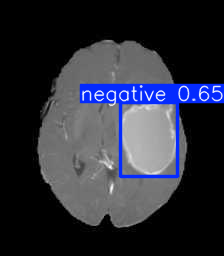

In [ ]:
# Test image
path_img = '/content/images/test/00124_9.jpg'

# Predicth with test image
result = model(path_img, save=True)

# Visualizamos resultados
result[0].show()